In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import torch.utils.data as data_utils
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from scipy.spatial import distance
from sklearn.metrics import mean_squared_error

In [2]:
import ipynb.fs.full.my_models as my_models

In [3]:
net3_ped1 = my_models.Net3_ped1()
net3_ped2 = my_models.Net3_ped2()
net3_ped3 = my_models.Net3_ped3()
net3_ped4 = my_models.Net3_ped4()
net3_ped5 = my_models.Net3_ped5()
net3_ped6 = my_models.Net3_ped6()
net3_ped7 = my_models.Net3_ped7()
net3_ped8 = my_models.Net3_ped8()
net3_ped9 = my_models.Net3_ped9()
# print(net3_ped2)

In [4]:
net3_ped_repulse_total = my_models.Net3_ped_repulse_total(net3_ped1, net3_ped2, net3_ped3, net3_ped4, net3_ped5,
                                                net3_ped6, net3_ped7, net3_ped8, net3_ped9)
# print(net3_ped_repulse_total)

In [5]:
net3_attract = my_models.Net3_attract()
# print(net3_attract)

In [6]:
net3_repulse = my_models.Net3_repulse()
# print(net3_repulse)

In [7]:
net3_ped_group = my_models.Net3_ped_group()
# print(net3_ped_group)

In [8]:
path_ped_repulse = "C:/Users/sakif/jupyter projects/thesis_test/modular test/weights/Net3_ped_repulse_total.pth"
path_attract = "C:/Users/sakif/jupyter projects/thesis_test/modular test/weights/net3_attract.pth"
path_repulse = "C:/Users/sakif/jupyter projects/thesis_test/modular test/weights/net3_repulse.pth"
path_group = "C:/Users/sakif/jupyter projects/thesis_test/modular test/weights/net3_ped_group.pth"

In [9]:
net3_ped_repulse_total.load_state_dict(torch.load(path_ped_repulse))
net3_attract.load_state_dict(torch.load(path_attract))
net3_repulse.load_state_dict(torch.load(path_repulse))
net3_ped_group.load_state_dict(torch.load(path_group))

<All keys matched successfully>

In [10]:
net3_complete = my_models.Net3_complete(net3_attract, net3_repulse, net3_ped_repulse_total, net3_ped_group)
# print(net3_complete)

In [11]:
path_net3_complete = "C:/Users/sakif/jupyter projects/thesis_test/modular test/net3_complete2.pth"

In [12]:
net3_complete.load_state_dict(torch.load(path_net3_complete))

<All keys matched successfully>

In [13]:
net3_a_rb = my_models.Net3_a_rb(net3_attract, net3_repulse)
path_net3_a_rb = "C:/Users/sakif/jupyter projects/thesis_test/modular test/weights/net3_a_rb.pth"
net3_a_rb.load_state_dict(torch.load(path_net3_a_rb))

<All keys matched successfully>

In [14]:
net3_a_rb_rp = my_models.Net3_a_rb_rp(net3_attract, net3_repulse, net3_ped_repulse_total)
path_net3_a_rb_rp = "C:/Users/sakif/jupyter projects/thesis_test/modular test/weights/net3_a_rb_rp.pth"
net3_a_rb_rp.load_state_dict(torch.load(path_net3_a_rb_rp))

<All keys matched successfully>

In [15]:
from scipy.interpolate import interp1d

def input_interpolated(temp_xy):
    # takes the 3 timesteps of inputs and rescales it into 10 timesteps
    # returns as (10, 2)
    # print("input to the interpolator: ",temp_xy)
    temp_x = np.array((temp_xy[0], temp_xy[2], temp_xy[4]))
    temp_y = np.array((temp_xy[1], temp_xy[3], temp_xy[5]))
    x_total = []
    y_total = []
    for p in range(2):
        x = temp_x[0+p:2+p]
        y = temp_y[0+p:2+p]
        if (x[0] == x[-1] and y[0] == y[-1]):
            print("we are here")
            # if both x values are same, we do this to avoid nan given by interp1d
            x_new = np.linspace(x[0], x[-1], num=5)
            y_new = np.linspace(y[0], y[-1], num=5)
        else:            
            f2 = interp1d(x, y)
            x_new = np.linspace(x[0], x[-1], num=5)
            
            y_new = f2(x_new)
        x_total.append(x_new)
        y_total.append(y_new)
    x_total = np.array(x_total)
    x_total = x_total.flatten()
    y_total = np.array(y_total)
    y_total = y_total.flatten()
    xy_input = []
    for p in range(len(x_total)):
        temp_array = [x_total[p], y_total[p]]
        xy_input.append(temp_array)
    xy_input = np.array(xy_input)
    return xy_input

In [16]:
# test_df_path = "C:/Users/sakif/jupyter projects/thesis_test/modular test/Untitled Folder/eth_data_prepared.csv"
# eth_data_prepared_normal.csv
# fps=10
# delta_t = 0.1

In [17]:
# test_df_path = "C:/Users/sakif/jupyter projects/thesis_test/modular test/Untitled Folder/STUDENTS03_data_prepared_normal.csv"

In [18]:
# with group changes
test_df_path = "C:/Users/sakif/jupyter projects/thesis_test/modular test/Untitled Folder/STUDENTS03_data_prepared_normal3.csv"

In [19]:
test_df = pd.read_csv(test_df_path, index_col=None)

In [20]:
test_df.head()

,frame_id,ped_no,pos_x,pos_y,vel_x,vel_y,rotation_angle,eta_group_x,eta_group_y,bound_x,...,n_w_y45,n_w_y46,n_w_y47,n_w_y48,n_w_y49,n_w_y50,n26_y,d_w_bound,n_w_bound_x,n_w_bound_y
0,10,0,-4.659964,-8.678696,1.470409,0.583279,0.0,0.0,0.0,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,-10.266158,11.194692,-0.416266,-0.909243
1,10,1,-1.330428,-6.608065,1.200562,0.246101,0.0,0.0,0.0,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,-10.266158,10.746638,-0.378891,-0.925441
2,10,2,-10.349845,-12.715208,1.469372,1.683016,0.0,0.0,0.0,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,-10.266158,10.317949,-0.337629,-0.941279
3,10,3,-21.047288,-12.720105,1.551914,0.815166,0.0,0.0,0.0,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,-10.266158,9.904792,-0.292733,-0.956194
4,10,4,0.241245,-6.906134,-2.211964,-0.325062,0.0,0.0,0.0,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,-10.266158,9.500195,-0.244686,-0.969602


In [21]:
from collections import Counter

In [22]:
tempppp = Counter(np.array(test_df['ped_no']))
# tempppp
# 171

In [23]:
len(np.unique(np.array(test_df['ped_no'])))
# 51: 64

434

In [24]:
# dataframe for individual pedestrian 
test_df_indiv = test_df.loc[test_df['ped_no'] == 2]
# test_df_indiv = test_df_indiv.loc[test_df_indiv['frame_id'] >= 846]

In [25]:
test_df_indiv.head()

,frame_id,ped_no,pos_x,pos_y,vel_x,vel_y,rotation_angle,eta_group_x,eta_group_y,bound_x,...,n_w_y45,n_w_y46,n_w_y47,n_w_y48,n_w_y49,n_w_y50,n26_y,d_w_bound,n_w_bound_x,n_w_bound_y
2,10,2,-10.349845,-12.715208,1.469372,1.683016,0.0,0.0,0.0,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,-10.266158,10.317949,-0.337629,-0.941279
31,20,2,-9.762096,-12.042001,1.469372,1.683016,0.0,0.0,0.0,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,-2.878280,10.804139,-0.447312,-0.894378
61,30,2,-9.174348,-11.368795,1.469372,1.683016,0.0,0.0,0.0,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,-11.657914,23.832493,-0.824335,-0.566102
92,40,2,-8.624108,-10.811061,1.375599,1.394333,0.0,0.0,0.0,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,-9.735254,18.941051,-0.778377,-0.627797
124,50,2,-8.078036,-10.266158,1.365180,1.362258,0.0,0.0,0.0,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,-7.385801,15.639804,-0.710486,-0.703712


In [26]:
from matplotlib import pyplot as plt

In [27]:
test_df_indiv.columns

Index(['frame_id', 'ped_no', 'pos_x', 'pos_y', 'vel_x', 'vel_y',
       'rotation_angle', 'eta_group_x', 'eta_group_y', 'bound_x',
       ...
       'n_w_y45', 'n_w_y46', 'n_w_y47', 'n_w_y48', 'n_w_y49', 'n_w_y50',
       'n26_y', 'd_w_bound', 'n_w_bound_x', 'n_w_bound_y'],
      dtype='object', length=264)

In [28]:
input_xy = np.array(test_df_indiv[["pos_x", "pos_y"]]).astype('float32')

In [29]:
input_xy[0]

array([-10.349845, -12.715208], dtype=float32)

In [30]:
input_xy.shape

(36, 2)

In [31]:
# concatinating (0, 19) == trajectories, [20, 21] == [e_x, e_y] ,[22, 23, 24] == [dw1, nw_x1, nw_y1], 
        # [25, 26, 27] == [dw2, nw_x2, nw_y2], [28, 29, 30] == [dw3, nw_x3, nw_y3], [31, 32, 33] == [dw4, nw_x4, nw_y4]
        # [34, 35, 36] == [dw5, nw_x5, nw_y5], [37, 38, 39] == [dw6, nw_x6, nw_y6], [40, 41, 42] == [dw7, nw_x7, nw_y7]
        # [43, 44, 45] == [dw8, nw_x8, nw_y8], [46, 47, 48] == [dw9, nw_x9, nw_y9]
        # [49, 50, 51] == [dw_b, nw_x_b, nw_y_b], [52, 53] == [centroid, angle]
        #  e, x_attract1, x_attract2, x_bound, x1, x2, x3, x4, x5, x6, x7, x8, x9, x_group, x_speed

In [32]:
# torch.cat((temp_input2, temp_input), axis=1)

In [33]:
def speed_finder(positions):
    # temp_seq = np.reshape(positions, (10, 2))
    positions = positions.view((10, 2))
    # print(positions)
    temp_array = []
    # global goal
    for k in reversed(range(10)):
        # print(k)
        temp_positions = positions[k] - positions[k - 1]
        """
        if k == 9:
            goal = np.array(temp_positions.tolist())
            goal = goal / np.linalg.norm(goal)
            goal = torch.from_numpy(goal.astype('float32'))
            # print(goal)
            """
        temp_positions = torch.norm(temp_positions)
        # print(temp_positions)
        # temp_positions = temp_positions.tolist()
        # print(temp_positions)
        temp_array.insert(0, temp_positions)
    return torch.Tensor([temp_array])

In [34]:
import math

In [35]:
# make a class prediction for one row of data
# give previous velocity directly here
#  e, x_attract1, x_attract2, x_bound, x1, x2, x3, x4, x5, x6, x7, x8, x9, x_group, x_speed
def predict_synthetic(model, delta_t, last_velocity, temp_input, temp_goal, temp_n1, temp_n2, temp_n3, temp_n4, temp_n5,
                      temp_n6, temp_n7, temp_n8, temp_n9, temp_n_bound, temp_n_group, temp_n_centroid, indicator):

    previous_velocity = last_velocity
    previous_speed = np.linalg.norm(previous_velocity)
    temp_input2 = temp_input - temp_input[:, 0]
    temp_input_1 = speed_finder(temp_input2)/delta_t
    x_speed = temp_input_1[:, -1:]
    # make prediction
    # yhat = net3_complete(goal2, x_attract1, x_attract2, x_bound, x1, x2, x3, x4, x5, x6, x7, x8, x9, x_group, x_speed)
    if indicator == 0: 
        # for net3_complete
        yhat = model(temp_goal, temp_input_1, temp_input2, temp_n_bound, temp_n1, temp_n2, temp_n3, temp_n4, temp_n5, 
                     temp_n6, temp_n7, temp_n8, temp_n9, temp_n_group, temp_n_centroid)
    elif indicator == 1:
        # for model with attract and repulse from obstacle
        yhat = model(temp_goal, temp_input_1, temp_input2, temp_n_bound)
    elif indicator == 2:
        # for model with attract, repulse from obstacle and other peds
        yhat = model(temp_goal, temp_input_1, temp_input2, temp_n_bound, temp_n1, temp_n2, temp_n3, temp_n4, temp_n5, 
                     temp_n6, temp_n7, temp_n8, temp_n9)
    elif indicator == 3:
        yhat = model(temp_input_1, temp_input2, temp_goal)
        
    
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    # that is actually not the desired velocity: try giving it directly

    desired_velocity = previous_velocity + (yhat * delta_t)
    desired_speed = np.linalg.norm(desired_velocity)
    
    # this section is to cap the velocity to a certain value
    factor = np.minimum(1.0, (1.3 * previous_speed) / desired_speed)
    # if factor != 1.0 : print("different factor")
    if desired_speed == 0:
        factor = 0.0
    # print(factor)
    current_velocity = desired_velocity * factor
    # print("current velocity: ", current_velocity, "\n")
    # print("current position: ", temp_input[0, -2:].detach().numpy(), "\n")
    next_position = temp_input[0, -2:].detach().numpy() + (current_velocity * delta_t)
     
    return yhat, next_position

In [36]:
def nearest_neighbour_finder(temp_neighbours):
    a = temp_neighbours[0]
    b = np.argsort(a[np.nonzero(a)])[:9]
    b = b + 1
    label_dw = "d_w"
    label_nw_x = "n_w_x"
    label_nw_y = "n_w_y"
    label_dw_list = []
    label_nw_x_list = []
    label_nw_y_list = []
    for r in range(len(b)):
        label_dw2 = label_dw + str(b[r])
        label_nw_x2 = label_nw_x + str(b[r])
        label_nw_y2 = label_nw_y + str(b[r])
        label_dw_list.append(label_dw2)
        label_nw_x_list.append(label_nw_x2)
        label_nw_y_list.append(label_nw_y2)

    label_dw_list = np.array(label_dw_list)
    label_nw_x_list = np.array(label_nw_x_list)
    label_nw_y_list = np.array(label_nw_y_list)
    return label_dw_list, label_nw_x_list, label_nw_y_list

In [57]:
def near_collision_finder(given_df, datset_type):
    frame_id_array = np.unique(given_df['frame_id'])
    cc_total = 0
    interaction_total = 0
    for k in range(len(frame_id_array)):
        # print(k)
        test_df_temp = given_df.loc[given_df['frame_id'] == frame_id_array[k]]
        # test_df_temp
        if datset_type == 'pred':
            temp_pos_list = np.array(test_df_temp[['pred_x', 'pred_y']])
        else:
            temp_pos_list = np.array(test_df_temp[['pos_x', 'pos_y']])
        if len(temp_pos_list) > 1:
            temp_ec_list = np.zeros((1,))
            for j in range(len(temp_pos_list) - 1):
                temp_diff = np.diff(temp_pos_list[j:], axis=0)
                temp_ec = np.linalg.norm(temp_diff, axis=1)
                temp_ec_list = np.concatenate((temp_ec_list, temp_ec), axis=0)
            cc_temp = np.count_nonzero(temp_ec_list[1:] <= 0.1)
            # if cc_temp > 1:
                # print("we got one")
            cc_total += cc_temp
            interaction_temp = len(temp_ec_list[1:])
            interaction_total += interaction_temp
                # temp_xxx += len(np.diff(temp_pos_list[j:], axis=0))
                # print("  ")
    print("total collision: ", cc_total)
    print("total interaction: ", interaction_total)
    print((cc_total/interaction_total)*100)
    return (cc_total/interaction_total)*100

In [37]:
input_xy[0]

array([-10.349845, -12.715208], dtype=float32)

In [38]:
 -2.0000000e+00  -1.5000000e+01
  -2.0000000e+00   1.0000000e+01
   1.0000000e+01   5.0000000e+00
  -1.5000000e+01  -2.0000000e+00  

IndentationError: unexpected indent (Temp/ipykernel_13548/567829191.py, line 2)

In [39]:
# using exact destination and exact start point
goal_perfect = (input_xy[-1] - input_xy[0])/np.linalg.norm((input_xy[-1] - input_xy[0]))
goal_perfect = torch.Tensor([goal_perfect])
goal_perfect

tensor([[0.7792, 0.6267]])

In [40]:
def goal_estimator(dest_list, input_xy):
    estimated_destination = np.argmin(np.linalg.norm((dest_list - input_xy[-1]), axis=1))
    goal_estimated = (dest_list[estimated_destination] - 
                      input_xy[0])/np.linalg.norm((dest_list[estimated_destination] - input_xy[0]))
    goal_estimated = torch.Tensor([goal_estimated])
    return goal_estimated
# goal_estimated

In [41]:
def goal_estimator2(given_dest, input_xy):
    goal_estimated = (given_dest - input_xy[0])/np.linalg.norm((given_dest - input_xy[0]))
    goal_estimated = torch.Tensor([goal_estimated])
    return goal_estimated

In [42]:
dest_df = pd.read_csv("C:/Users/Sakif/jupyter projects/thesis_test/filter/students03_estimated_dests1.csv", index_col=0)
estimated_dest_list = np.array(dest_df[["dest_x", "dest_y"]])
estimated_dest_list.shape

(434, 2)

In [43]:
dest_list = np.array(((-0.8722162, -2.3144598), (-28.848972, -14.880247), (-22.613573, -3.5443945), (1.2566633, -8.276182)))

In [44]:
goal_estimated = goal_estimator(dest_list, input_xy)
goal_estimated

tensor([[0.6735, 0.7391]])

In [45]:
# using exact destination and exact start point
# goal_perfect = (input_xy[14] - input_xy[0])/np.linalg.norm((input_xy[14] - input_xy[0]))
# goal_perfect = torch.Tensor([goal_perfect])
# goal_perfect

In [46]:
len(input_xy)

36

In [47]:
def get_last_disp(y_true, y_prediction):
    last_disp = np.linalg.norm((y_true[-1, :] - y_prediction[-1, :]))
    return last_disp

def get_eucledian(true_values, predicted_values):
    eucledian_v = np.linalg.norm((true_values - predicted_values), axis =1)
    eucledian_v = np.mean(eucledian_v)
    return eucledian_v

In [60]:
# to predict all the trajectories, 0.1 seconds of prediction at a time
# input of one seconds
# next step: make it into a function
# function to get predictions of trajectories, recursively
def get_predictions(step_size, delta_t, temp_cycle, input_xy, velocity, n1, n2, n3, n4, n5, n6, n7, n8, n9, n_bound,
                    n_group, n_centroid, estimated_dest, indicator):
    # dest_list = np.array(((-2, 5.8566027), (-6.5902743, 0.065724367), (-6.5553084, 11.867515), (15.10717, 5.5659299)))
    step_size = step_size
    delta_t = delta_t
    temp_cycle = temp_cycle
    predicted_trajs = []
    real_trajs = []
    force_pred = []
    indicator2 = indicator
    interpolate = True
    my_goal = goal_estimator2(estimated_dest, input_xy)
    # len(input_xy)
    end_cycle = len(input_xy)
    for p in range(5, end_cycle, step_size):
        # print("timesteps: ", p)
        start_cycle = temp_cycle + p
        if (start_cycle + step_size) > end_cycle: 
            # print("i am here")
            continue

        if (temp_cycle != 10):
            if not interpolate:
                temp_input5 = np.concatenate((np.zeros(14), input_xy[(start_cycle - temp_cycle):start_cycle].flatten()))
                temp_input = torch.Tensor([temp_input5])
            else:
                temp_input_total = input_xy[(start_cycle - temp_cycle):start_cycle].flatten()
                temp_input5 = input_interpolated(temp_input_total).flatten()
                temp_input = torch.Tensor([temp_input5])
        else: 
            temp_input = torch.Tensor([input_xy[(start_cycle - temp_cycle):start_cycle].flatten()])

        temp_real = input_xy[(start_cycle):(start_cycle + step_size)]
        # print((start_cycle - 10), start_cycle)
        # print(start_cycle, (start_cycle + step_size))
        real_trajs.append(temp_real)
        prediction_list = []
        next_position_list = []
        # print("input: ", temp_input, "\n")
        for x in range(step_size):
            if x == 0:
                temp_input3 = temp_input
            else: 
                if not interpolate:
                    temp_input3 = torch.cat((temp_input[:, 2:], torch.Tensor(next_position)), axis=1)
                    temp_input = temp_input3
                else:
                    temp_input_total = np.concatenate((temp_input_total[2:], next_position.flatten()))
                    temp_input3 = input_interpolated(temp_input_total).flatten()
                    temp_input3 = torch.Tensor([temp_input3])
                    temp_input = temp_input3

            temp_velocity = velocity[(start_cycle -1 + x)]
            temp_goal = my_goal
            temp_n1 = torch.Tensor([n1[start_cycle + x].flatten()])
            temp_n2 = torch.Tensor([n2[start_cycle + x].flatten()])
            temp_n3 = torch.Tensor([n3[start_cycle + x].flatten()])
            temp_n4 = torch.Tensor([n4[start_cycle + x].flatten()])
            temp_n5 = torch.Tensor([n5[start_cycle + x].flatten()])
            temp_n6 = torch.Tensor([n6[start_cycle + x].flatten()])
            temp_n7 = torch.Tensor([n7[start_cycle + x].flatten()])
            temp_n8 = torch.Tensor([n8[start_cycle + x].flatten()])
            temp_n9 = torch.Tensor([n9[start_cycle + x].flatten()])
            temp_n_bound = torch.Tensor([n_bound[start_cycle + x].flatten()])
            temp_n_group = torch.Tensor([n_group[start_cycle + x].flatten()])
            temp_n_centroid = torch.Tensor([n_centroid[start_cycle + x].flatten()])
            
            temp_model = net3_complete
            # print(indicator2)
            
            if indicator2 == 0:
                prediction1, next_position = predict_synthetic(net3_complete, delta_t, temp_velocity,  temp_input3, temp_goal, 
                                                           temp_n1, temp_n2, temp_n3, temp_n4, temp_n5, temp_n6, temp_n7, 
                                                           temp_n8, temp_n9, temp_n_bound, temp_n_group, temp_n_centroid,
                                                           indicator2)
            elif indicator2 == 1:
                # print("we are here")
                prediction1, next_position = predict_synthetic(net3_a_rb, delta_t, temp_velocity,  temp_input3, temp_goal, 
                                                           temp_n1, temp_n2, temp_n3, temp_n4, temp_n5, temp_n6, temp_n7, 
                                                           temp_n8, temp_n9, temp_n_bound, temp_n_group, temp_n_centroid,
                                                           indicator2)
            elif indicator2 == 2:
                prediction1, next_position = predict_synthetic(net3_a_rb_rp, delta_t, temp_velocity,  temp_input3, temp_goal, 
                                                           temp_n1, temp_n2, temp_n3, temp_n4, temp_n5, temp_n6, temp_n7, 
                                                           temp_n8, temp_n9, temp_n_bound, temp_n_group, temp_n_centroid,
                                                           indicator2)
                
            elif indicator2 == 3: 
                prediction1, next_position = predict_synthetic(net3_attract, delta_t, temp_velocity,  temp_input3, temp_goal, 
                                                           temp_n1, temp_n2, temp_n3, temp_n4, temp_n5, temp_n6, temp_n7, 
                                                           temp_n8, temp_n9, temp_n_bound, temp_n_group, temp_n_centroid,
                                                           indicator2)
            else:
                pass
            # print(temp_model)

            prediction_list.append(prediction1)
            next_position_list.append(next_position)


        prediction_list = np.array(prediction_list)
        next_position_list = np.array(next_position_list)
        predicted_trajs.append(next_position_list)
        force_pred.append(prediction_list)

    predicted_trajs = np.array(predicted_trajs)
    force_pred = np.array(force_pred)
    real_trajs = np.array(real_trajs)

    predicted_trajs_reshaped = np.reshape(predicted_trajs, (int((len(predicted_trajs.flatten())/2)), 2))
    real_trajs_reshaped = np.reshape(real_trajs, (int((len(real_trajs.flatten())/2)), 2))
    # print(real_trajs.shape)
    # print(predicted_trajs.shape)

    eucledian_temp_list = []
    for k in range(0, len(predicted_trajs_reshaped), step_size):
        eucledian_temp = get_eucledian(real_trajs_reshaped[0+k:12+k], predicted_trajs_reshaped[0+k:12+k])
        # print(eucledian_temp)
        eucledian_temp_list.append(eucledian_temp)
    eucledian_temp_list = np.array(eucledian_temp_list)
    final_eucledian_dist = np.mean(eucledian_temp_list)
    final_disp = get_last_disp(real_trajs_reshaped, predicted_trajs_reshaped)

    return final_eucledian_dist, final_disp, real_trajs_reshaped, predicted_trajs_reshaped

In [61]:
# test_df_indiv = test_df.loc[test_df['ped_no'] == 22]
# test_df_indiv = test_df_indiv.loc[test_df_indiv['frame_id'] >= 1242]
input_xy[0][0]

-2.6254795

In [50]:
ped_array = np.unique(np.array(test_df['ped_no']))
end_points = []

for j in range(len(ped_array)):
    # if j == 5: break
    test_df_indiv = test_df.loc[test_df['ped_no'] == ped_array[j]]
    
    input_xy = np.array(test_df_indiv[["pos_x", "pos_y"]]).astype('float32')
    # print("pedestrian no: ", ped_array[j], "\n")
    temp_end = [input_xy[-1][0], input_xy[-1][1]]
    end_points.append(temp_end)
end_points = np.array(end_points)
end_points.shape

(434, 2)

In [51]:
from sklearn.cluster import KMeans

In [52]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(end_points)
kmeans.cluster_centers_

array([[ -0.8722162,  -2.3144598],
       [-28.848972 , -14.880247 ],
       [-22.613573 ,  -3.5443945],
       [  1.2566633,  -8.276182 ]], dtype=float32)

In [68]:
ped_array = np.unique(np.array(test_df['ped_no']))
eucledian_for_all = []
displacement_for_all = []
temp_count = 0
temp_count2 = 0
real_traj_list = np.zeros((1, 2))
pred_traj_list = np.zeros((1, 2))
time_steps_list = np.zeros((1,))
print(len(ped_array))
for j in range(len(ped_array)):
    # if j == 5: break
    test_df_indiv = test_df.loc[test_df['ped_no'] == ped_array[j]]
    
    input_xy = np.array(test_df_indiv[["pos_x", "pos_y"]]).astype('float32')
    # print("pedestrian no: ", ped_array[j], "\n")
    if len(input_xy) < 20: 
        # print("length of input_xy", len(input_xy), "\n")
        # print("skipped")
        temp_count2 +=1
        continue

    temp_neighbours = np.array(test_df_indiv[["d_w1", "d_w2", "d_w3", "d_w4", "d_w5", "d_w6", "d_w7", "d_w8", 
                                              "d_w9", "d_w10", "d_w11", "d_w12", "d_w13", "d_w14", "d_w15", 
                                              "d_w16", "d_w17", "d_w18", "d_w19", "d_w20", "d_w21", "d_w22", 
                                              "d_w23", "d_w24", "d_w25", "d_w26"]]).astype('float32')
    neighbour_test = temp_neighbours[0]

    if len(neighbour_test[np.nonzero(neighbour_test)]) > 9:
        temp_count += 1
        # print("we are here")
        dw_list, nw_x_list, nw_y_list = nearest_neighbour_finder(temp_neighbours)
        # print(dw_list)

        n1 = np.array(test_df_indiv[[dw_list[0], nw_x_list[0], nw_y_list[0]]]).astype('float32')
        n2 = np.array(test_df_indiv[[dw_list[1], nw_x_list[1], nw_y_list[1]]]).astype('float32')
        n3 = np.array(test_df_indiv[[dw_list[2], nw_x_list[2], nw_y_list[2]]]).astype('float32')
        n4 = np.array(test_df_indiv[[dw_list[3], nw_x_list[3], nw_y_list[3]]]).astype('float32')
        n5 = np.array(test_df_indiv[[dw_list[4], nw_x_list[4], nw_y_list[4]]]).astype('float32')
        n6 = np.array(test_df_indiv[[dw_list[5], nw_x_list[5], nw_y_list[5]]]).astype('float32')
        n7 = np.array(test_df_indiv[[dw_list[6], nw_x_list[6], nw_y_list[6]]]).astype('float32')
        n8 = np.array(test_df_indiv[[dw_list[7], nw_x_list[7], nw_y_list[7]]]).astype('float32')
        n9 = np.array(test_df_indiv[[dw_list[8], nw_x_list[8], nw_y_list[8]]]).astype('float32')
    else:
        n1 = np.array(test_df_indiv[["d_w1", "n_w_x1", "n_w_y1"]]).astype('float32')
        n2 = np.array(test_df_indiv[["d_w2", "n_w_x2", "n_w_y2"]]).astype('float32')
        n3 = np.array(test_df_indiv[["d_w3", "n_w_x3", "n_w_y3"]]).astype('float32')
        n4 = np.array(test_df_indiv[["d_w4", "n_w_x4", "n_w_y4"]]).astype('float32')
        n5 = np.array(test_df_indiv[["d_w5", "n_w_x5", "n_w_y5"]]).astype('float32')
        n6 = np.array(test_df_indiv[["d_w6", "n_w_x6", "n_w_y6"]]).astype('float32')
        n7 = np.array(test_df_indiv[["d_w7", "n_w_x7", "n_w_y7"]]).astype('float32')
        n8 = np.array(test_df_indiv[["d_w8", "n_w_x8", "n_w_y8"]]).astype('float32')
        n9 = np.array(test_df_indiv[["d_w9", "n_w_x9", "n_w_y9"]]).astype('float32')

    input_xy = np.array(test_df_indiv[["pos_x", "pos_y"]]).astype('float32')

    n_bound = np.array(test_df_indiv[["d_w_bound", "n_w_bound_x", "n_w_bound_y"]]).astype('float32')
    # n_group = np.array(test_df_indiv[["centroid_dist", "rotation_angle"]]).astype('float32')
    n_group = np.array(test_df_indiv["rotation_angle"]).astype('float32')
    n_centroid = np.array(test_df_indiv[["eta_group_x", "eta_group_y"]]).astype('float32')

    velocity = np.array(test_df_indiv[["vel_x", "vel_y"]]).astype('float32')

    step_size = 12
    delta_t = 0.4
    temp_cycle = 3
    estimated_destination = estimated_dest_list[j]
    indicator3 = 3
    # 0 = net3_complete, 1 = attract + obstacle, 2 = attract + obst + ped, 3 = attract_only
    # temp_clcle = the cycle from where the prediction actually stats
    # input_xy, velocity, n1, n2, n3, n4, n5, n6, n7, n8, n9, n_bound, n_group

    eucleid, disp, real_traj_new, pred_traj_new = get_predictions(step_size, delta_t, temp_cycle, input_xy, velocity, n1, n2,
                                                                  n3, n4, n5, n6, n7, n8, n9, n_bound, n_group, n_centroid, 
                                                                  estimated_dest=estimated_destination, indicator=indicator3)
    # print(eucleid, disp)
    temp_timestep = np.array(test_df_indiv["frame_id"][:len(real_traj_new)])
    real_traj_list = np.concatenate((real_traj_list, real_traj_new), axis=0)
    pred_traj_list = np.concatenate((pred_traj_list, pred_traj_new), axis=0)
    # real_traj_list.append(real_traj_new.flatten())
    time_steps_list = np.concatenate((time_steps_list, temp_timestep), axis=0)
    # print(eucleid, disp)
    
    if not math.isnan(eucleid):
        eucledian_for_all.append(eucleid)
        displacement_for_all.append(disp)

eucledian_for_all = np.array(eucledian_for_all)
displacement_for_all = np.array(displacement_for_all)

print(temp_count2)
print("mean eucledian distance: ", np.mean(eucledian_for_all), "\n")
print("mean final displacement: ", np.mean(displacement_for_all), "\n")
real_traj_list = real_traj_list[1:]
pred_traj_list = pred_traj_list[1:]
time_steps_list = time_steps_list[1:]
print(len(real_traj_list))
print(len(time_steps_list))
print(len(pred_traj_list))
        # print("pedestrian no: ", ped_array[j], "\n")
    # if not math.isnan()
        

434
69
mean eucledian distance:  1.1244805 

mean final displacement:  2.2281005 

11844
11844
11844


In [63]:
my_dict = {'frame_id': time_steps_list, 'real_x': real_traj_list[:, 0], 'real_y': real_traj_list[:, 1], 
           'pred_x': pred_traj_list[:, 0], 'pred_y': pred_traj_list[:, 1]}
my_df = pd.DataFrame(data=my_dict, index=None)

In [64]:
collision_pred = near_collision_finder(my_df, datset_type='pred')

total collision:  0
total interaction:  143308
0.0


In [65]:
collision_real = near_collision_finder(test_df, datset_type= 'real')

total collision:  0
total interaction:  295695
0.0


In [ ]:
# for attract only
# mean eucledian distance:  1.1112713
# mean final displacement:  2.1415815
# for net3_a_rb
# mean eucledian distance:  0.29154766 
# mean final displacement:  0.48004964

# for net3_a_rb_rp
# mean eucledian distance:  0.2980731
# mean final displacement:  0.5081364

# for net3_complete
# mean eucledian distance:  0.2540254 
# mean final displacement:  0.4113109

In [499]:
eucledian_distance = get_eucledian(real_trajs_reshaped, predicted_trajs_reshaped)

last_displacement = get_last_disp(real_trajs_reshaped, predicted_trajs_reshaped)
print("eucledian distance: ", eucledian_distance)
print("last displacement: ", last_displacement)

eucledian distance:  0.8359658
last displacement:  1.1081626


In [496]:
# for one cycle only
eucledian_distance = get_eucledian(real_trajs_reshaped[:12], predicted_trajs_reshaped[:12])
last_displacement = get_last_disp(real_trajs_reshaped[:12], predicted_trajs_reshaped[:12])
print("eucledian distance: ", eucledian_distance)
print("last displacement: ", last_displacement)

eucledian distance:  0.98691934
last displacement:  1.2742083


In [435]:
input_xy.shape

(24, 2)

In [483]:
input_xy[3]

array([-0.07829376,  4.242871  ], dtype=float32)

In [484]:
real_trajs_reshaped[0]

array([-0.07829376,  4.242871  ], dtype=float32)

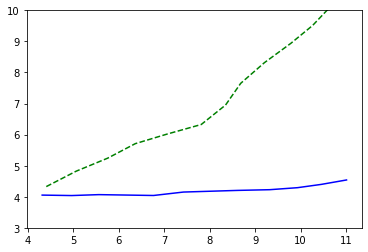

In [468]:
# for goal1 = start = [2, 10.3]
# for all predicted trajectories
# for taking ten inputs
plt.plot(predicted_trajs_reshaped[:, 0], predicted_trajs_reshaped[:, 1], '--', label='predicted', color= "green")
# plt.scatter(predicted_trajs_reshaped[:, 0], predicted_trajs_reshaped[:, 1])
plt.plot(real_trajs_reshaped[:, 0], real_trajs_reshaped[:, 1], label='real', color="blue")
plt.ylim(3, 10)
plt.show()

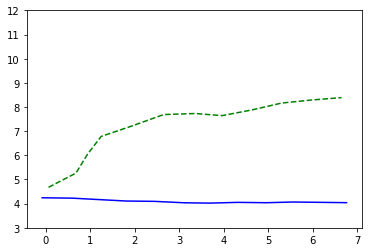

In [475]:
# for 3 cycle data as input and appended by zero
plt.plot(predicted_trajs_reshaped[:, 0], predicted_trajs_reshaped[:, 1], '--', label='predicted', color= "green")
# plt.scatter(predicted_trajs_reshaped[:, 0], predicted_trajs_reshaped[:, 1])
plt.plot(real_trajs_reshaped[:, 0], real_trajs_reshaped[:, 1], label='real', color="blue")
plt.ylim(3, 12)
plt.show()

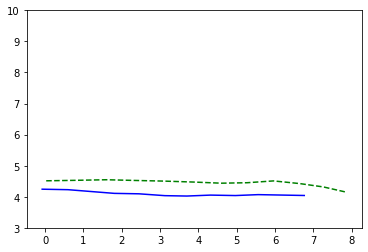

In [480]:
# for goal1 = start = [2, 10.3]
# for all predicted trajectories
# for 3 cycle data as input and interpolated to 10
plt.plot(predicted_trajs_reshaped[:, 0], predicted_trajs_reshaped[:, 1], '--', label='predicted', color= "green")
# plt.scatter(predicted_trajs_reshaped[:, 0], predicted_trajs_reshaped[:, 1])
plt.plot(real_trajs_reshaped[:, 0], real_trajs_reshaped[:, 1], label='real', color="blue")
plt.ylim(3, 10)
plt.show()

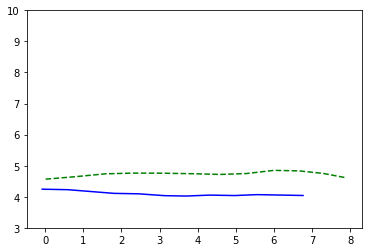

In [497]:
# for goal1 = start = [2, 10.3]
# for all predicted trajectories
# for 3 cycle data as input and interpolated to 10
# for estimated goal
plt.plot(predicted_trajs_reshaped[:, 0], predicted_trajs_reshaped[:, 1], '--', label='predicted', color= "green")
# plt.scatter(predicted_trajs_reshaped[:, 0], predicted_trajs_reshaped[:, 1])
plt.plot(real_trajs_reshaped[:, 0], real_trajs_reshaped[:, 1], label='real', color="blue")
plt.ylim(3, 10)
plt.show()